In [1]:
import os
import ast
import csv
import sys
import string
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
parseStr = lambda x: x.isalpha() and x or x.isdigit() and \
int(x) or x.isalnum() and x or \
len(set(string.punctuation).intersection(x)) == 1 and \
x.count('.') == 1 and float(x) or x

## 一. 畫圖參數設定

In [3]:
# comb_set = int(sys.argv[1])
# deltas = ast.literal_eval(sys.argv[2])

In [4]:
comb_set = 1
deltas = np.arange(0.01, 1.01, 0.01)# delta 會跑哪些值

In [5]:
deltas_tick = np.arange(0, 1.1, 0.1)
comb_str = ['comb1']
result_dir = "./results/"
cov_dir = "./results/comb" + str(comb_set) + "_cor/"
model_dir = "./model/comb" + str(comb_set) + "/"
plot_dir = "./plots/comb" + str(comb_set) + "/"

放置圖片的資料夾

In [6]:
if not os.path.exists(plot_dir) : os.mkdir(plot_dir)

## 二. 讀取與$\delta$有關的metric並繪圖
### 1. 讀取九個metric並計算平均

In [7]:
ad_limit = []
a2d_limit = []
alpha = []
bd_limit = []
b2d_limit = []
beta = []
yd_limit = []
y2d_limit = []
gamma = []

In [8]:
for comb in comb_str: # 對每個q的資料夾
    df_list = []
    result_list = sorted(os.listdir(result_dir + comb + '_decode/')) # q=0到1的每個檔案
    
    ad_limit_delta = [0]
    a2d_limit_delta = [0]
    alpha_delta = [0]
    bd_limit_delta = [0]
    b2d_limit_delta = [0]
    beta_delta = [0]
    yd_limit_delta = [1]
    y2d_limit_delta = [1]
    gamma_delta = [1]
    
    for file in result_list: # 把所有dataframe存進df_list裡面
        df_list.append(pd.read_csv(result_dir + comb + '_decode/' + file, 
                                    names = ['ad_limit_delta', 'a2d_limit_delta', 'alpha_delta', 'bd_limit_delta', 
                                            'b2d_limit_delta', 'beta_delta', 'yd_limit_delta', 'y2d_limit_delta', 
                                            'gamma_delta'], 
                                    engine='python'))
        
    for x in df_list: # 對每個dataframe
        ad_limit_delta.append(np.mean(x['ad_limit_delta']))
        a2d_limit_delta.append(np.mean(x['a2d_limit_delta']))
        alpha_delta.append(np.mean(x['alpha_delta']))
        bd_limit_delta.append(np.mean(x['bd_limit_delta']))
        b2d_limit_delta.append(np.mean(x['b2d_limit_delta']))
        beta_delta.append(np.mean(x['beta_delta']))
        yd_limit_delta.append(np.mean(x['yd_limit_delta']))
        y2d_limit_delta.append(np.mean(x['y2d_limit_delta']))
        gamma_delta.append(np.mean(x['gamma_delta']))
        
    ad_limit.append(ad_limit_delta)
    a2d_limit.append(a2d_limit_delta)
    alpha.append(alpha_delta)
    bd_limit.append(bd_limit_delta)
    b2d_limit.append(b2d_limit_delta)
    beta.append(beta_delta)
    yd_limit.append(yd_limit_delta)
    y2d_limit.append(y2d_limit_delta)
    gamma.append(gamma_delta)

In [9]:
metrics = [ad_limit, a2d_limit, alpha, bd_limit, b2d_limit, beta, yd_limit, y2d_limit, gamma]
metrics_str = ['ad_limit', 'a2d_limit', 'alpha', 'bd_limit', 'b2d_limit', 
               'beta', 'yd_limit', 'y2d_limit', 'gamma']
metrics_LaTeX = [r'$\lim_{i\to\infty}\alpha_{d_1}^{(i)}$',
                 r'$\lim_{i\to\infty}\alpha_{d_2}^{(i)}$', 
                 r'$\lim_{i\to\infty}\alpha^{(i)}$', 
                 r'$\lim_{i\to\infty}\beta_{Gd_1}^{(i)}$', 
                 r'$\lim_{i\to\infty}\beta_{Gd_2}^{(i)}$', 
                 r'$\lim_{i\to\infty}\beta^{(i)}$',
                 r'$\lim_{i\to\infty}\gamma_{d_1}^{(i)}$', 
                 r'$\lim_{i\to\infty}\gamma_{d_2}^{(i)}$', 
                 r'$\lim_{i\to\infty}\gamma^{(i)}$']

### 2. 一個找出某一組合跑了那些$\delta$的函式

In [10]:
def find_deltas(comb): # 找出每個q值資料夾中所有.csv檔案名稱中的delta值,input q必須是字串
    csv_list = sorted(os.listdir(result_dir  + comb + "_decode/"))
    d = [parseStr(file_name[0:][:-4]) for file_name in csv_list] # 去掉尾端的.csv以及開頭的delta=
    d = [0.0] + d
    return d 

### 3. 繪製log plot

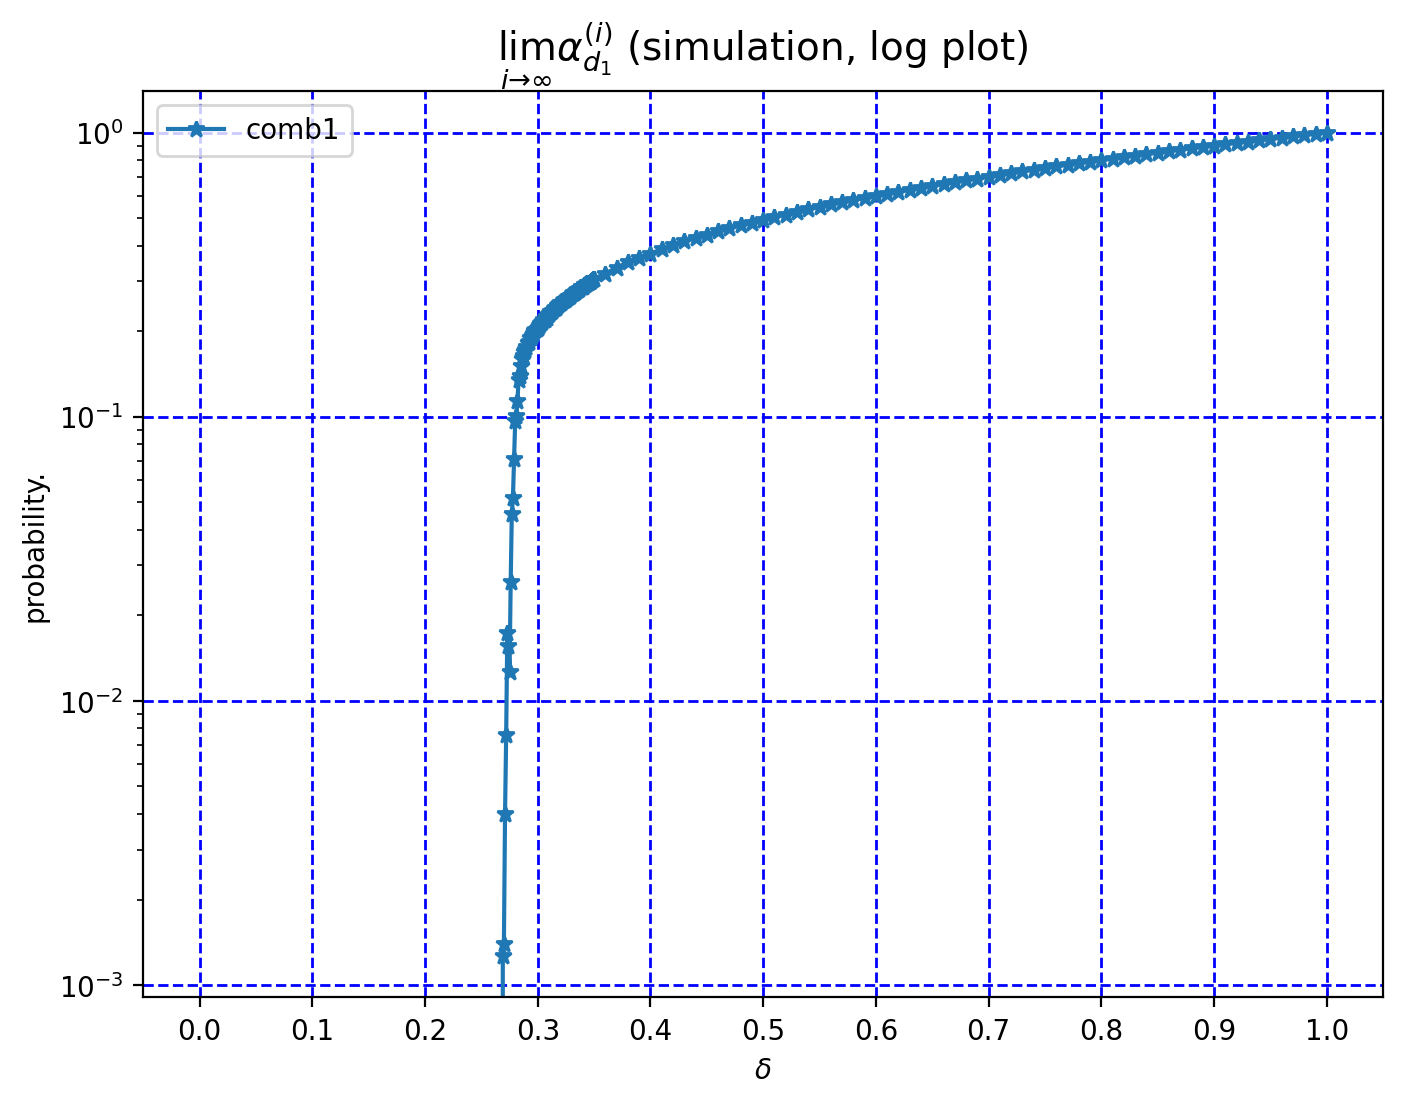

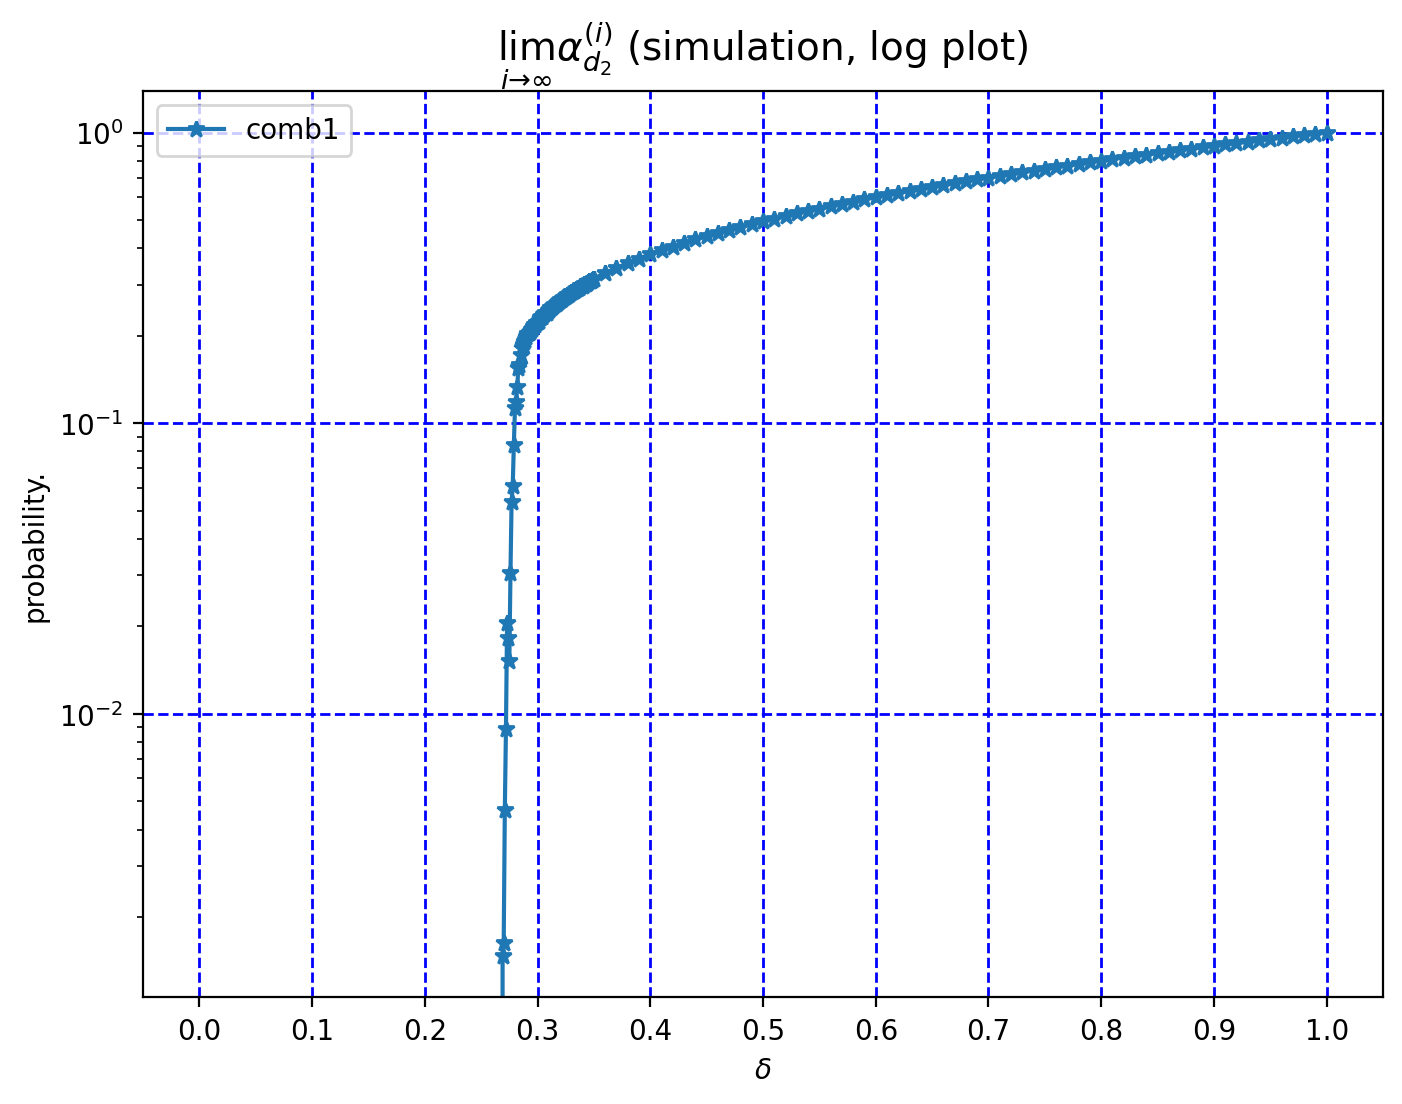

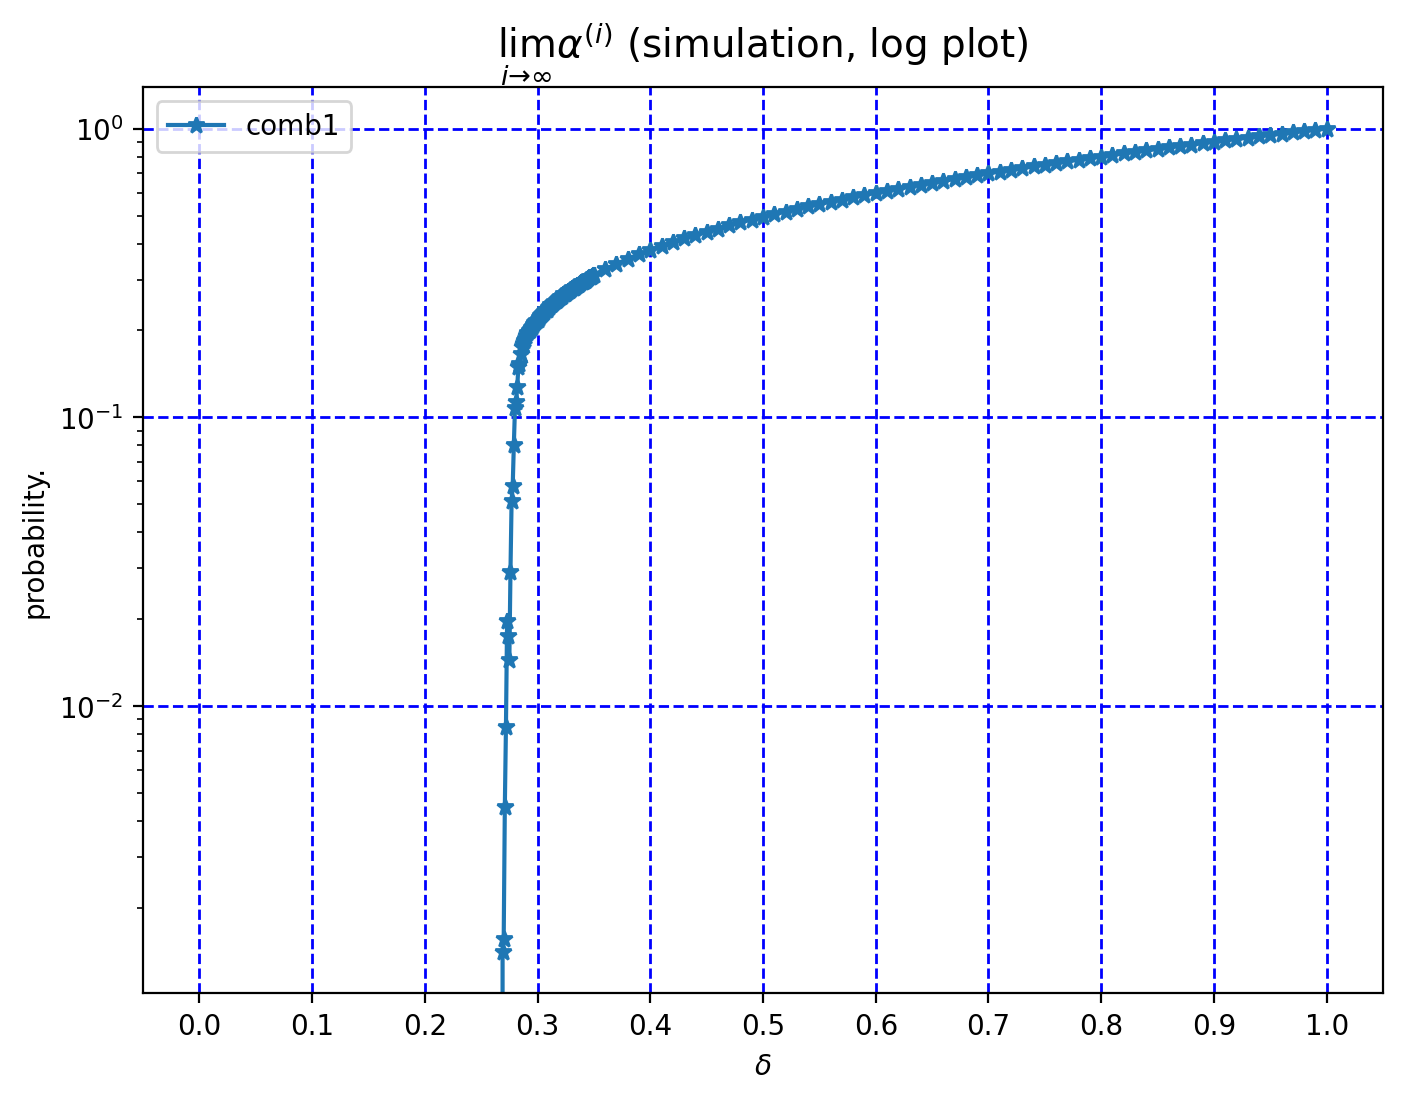

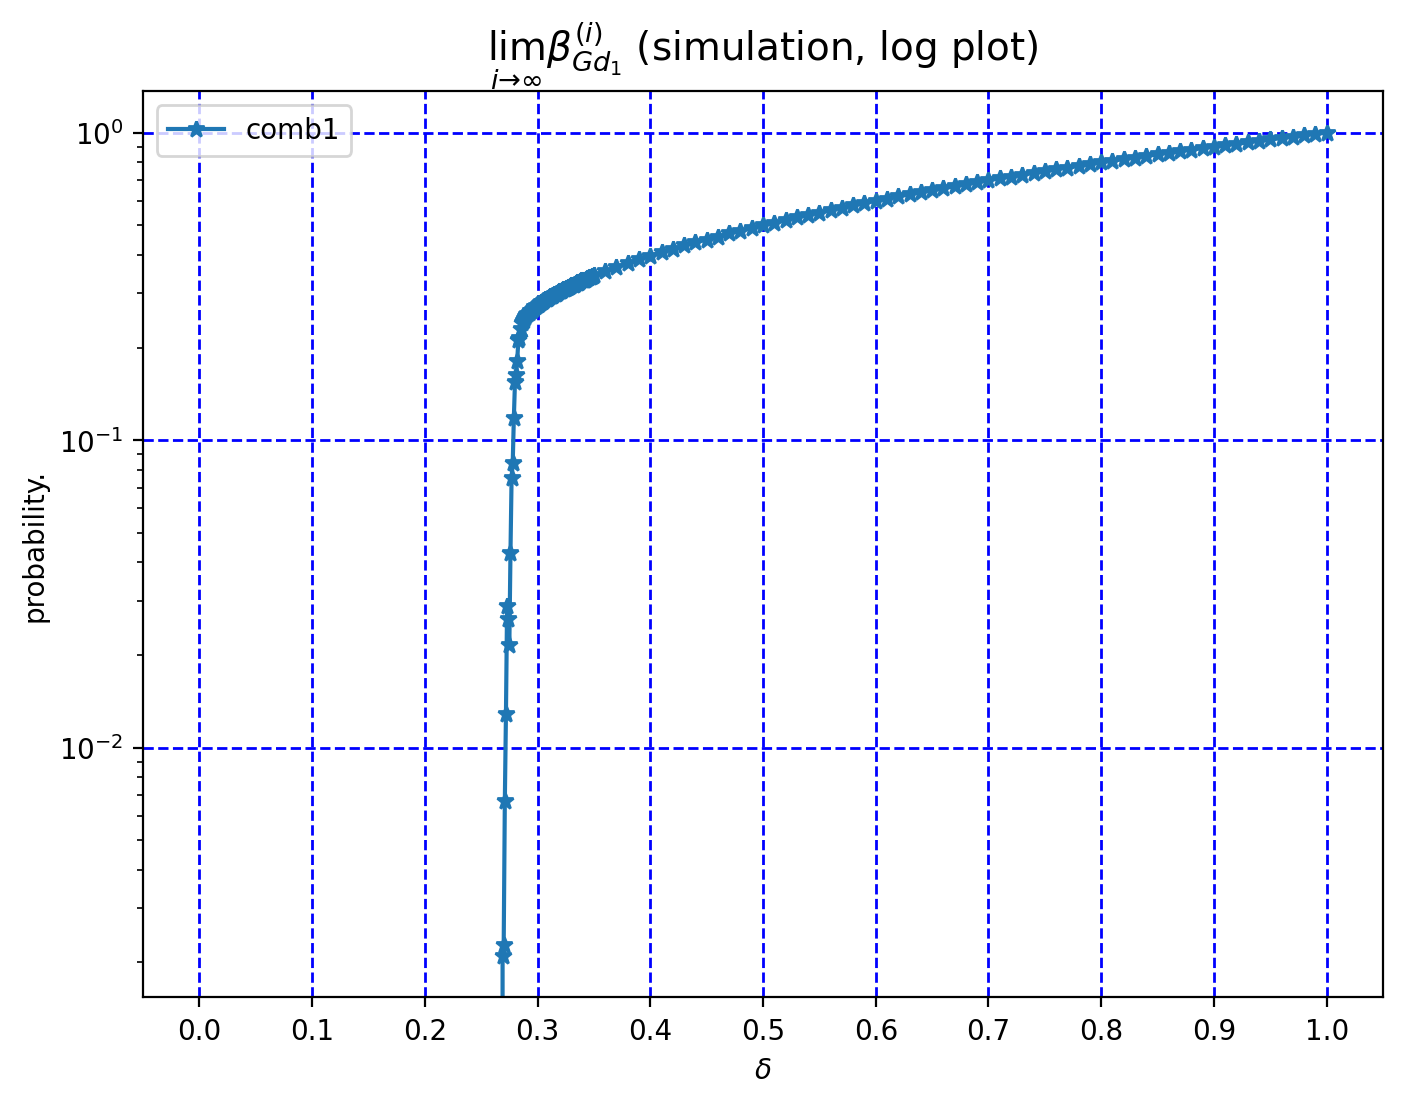

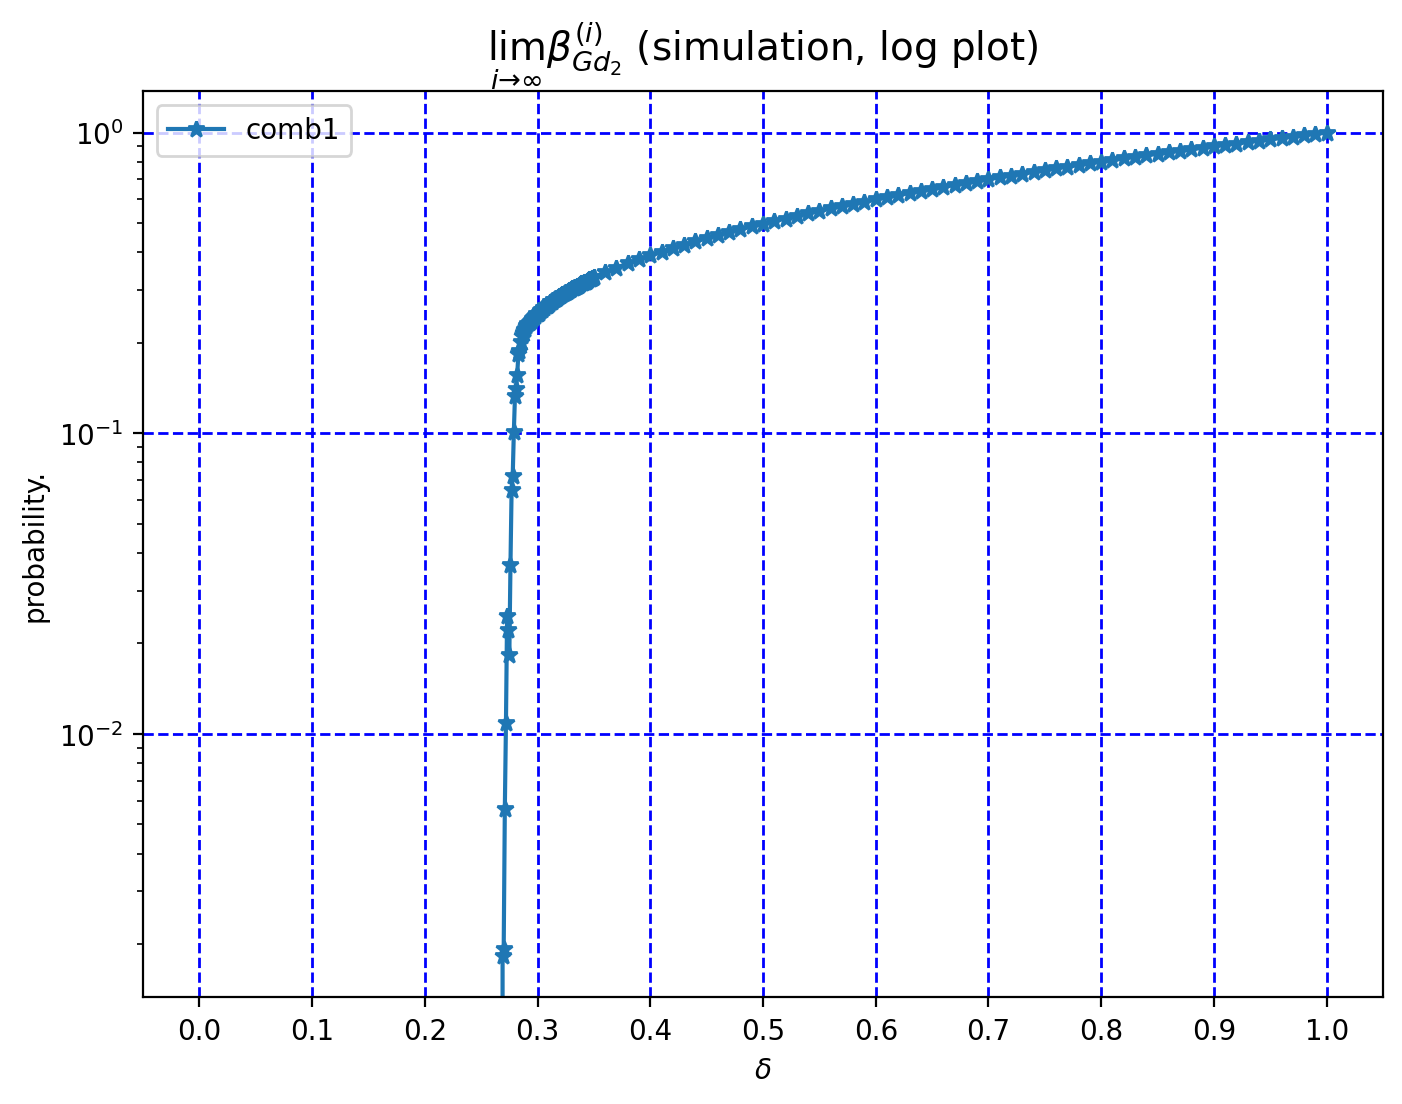

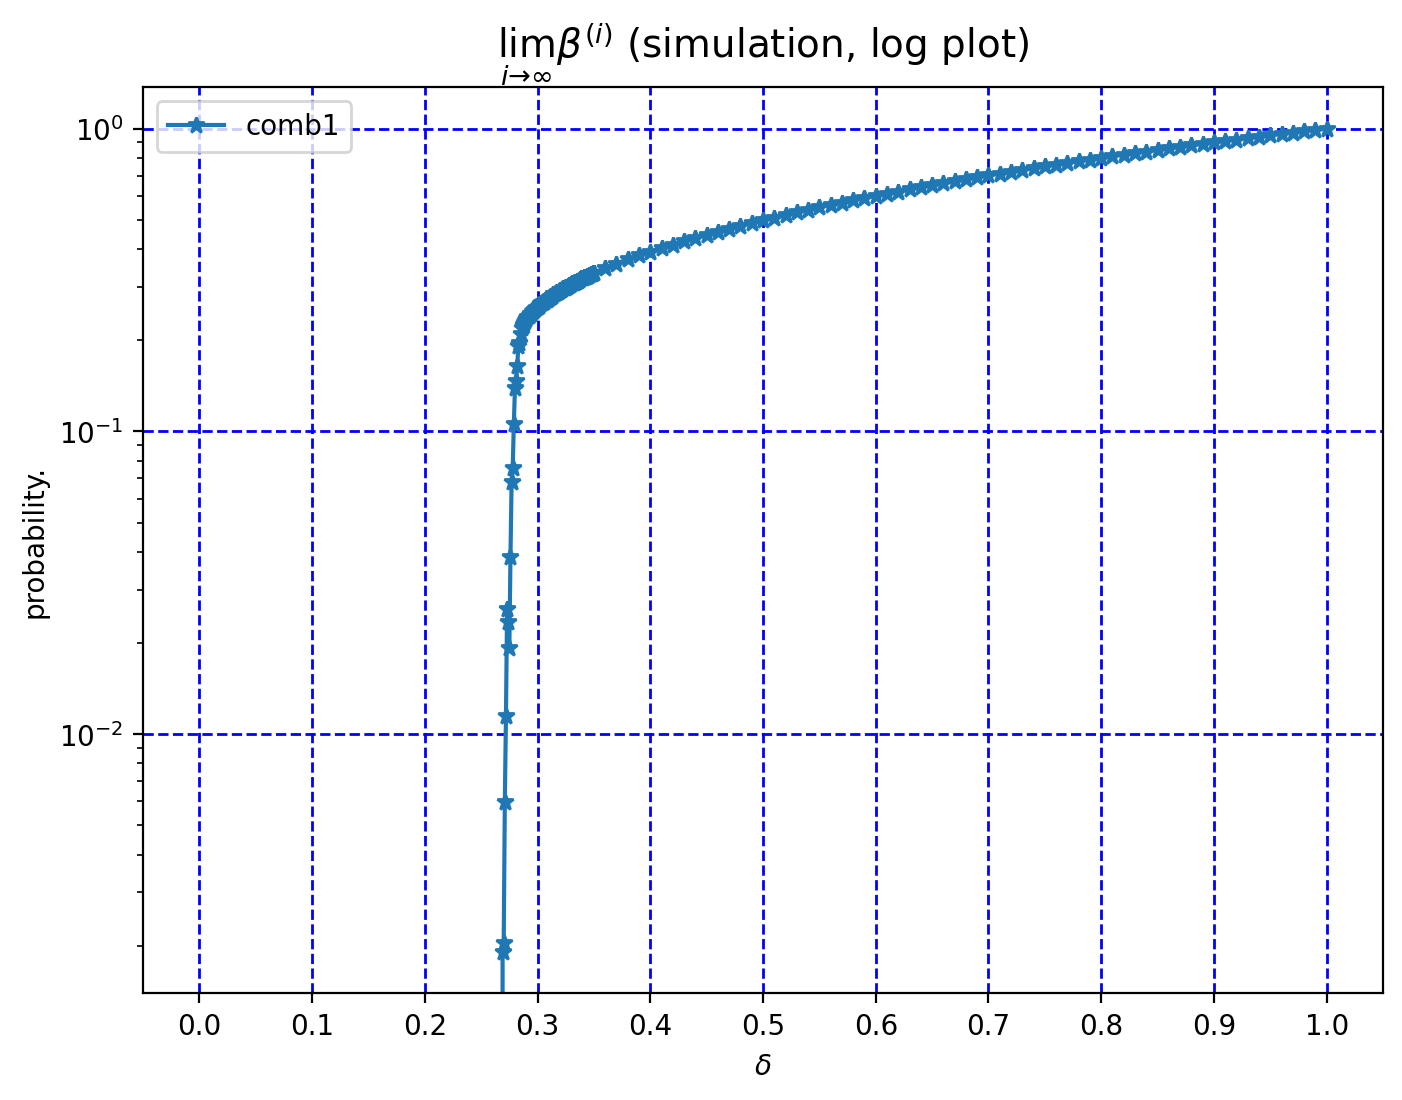

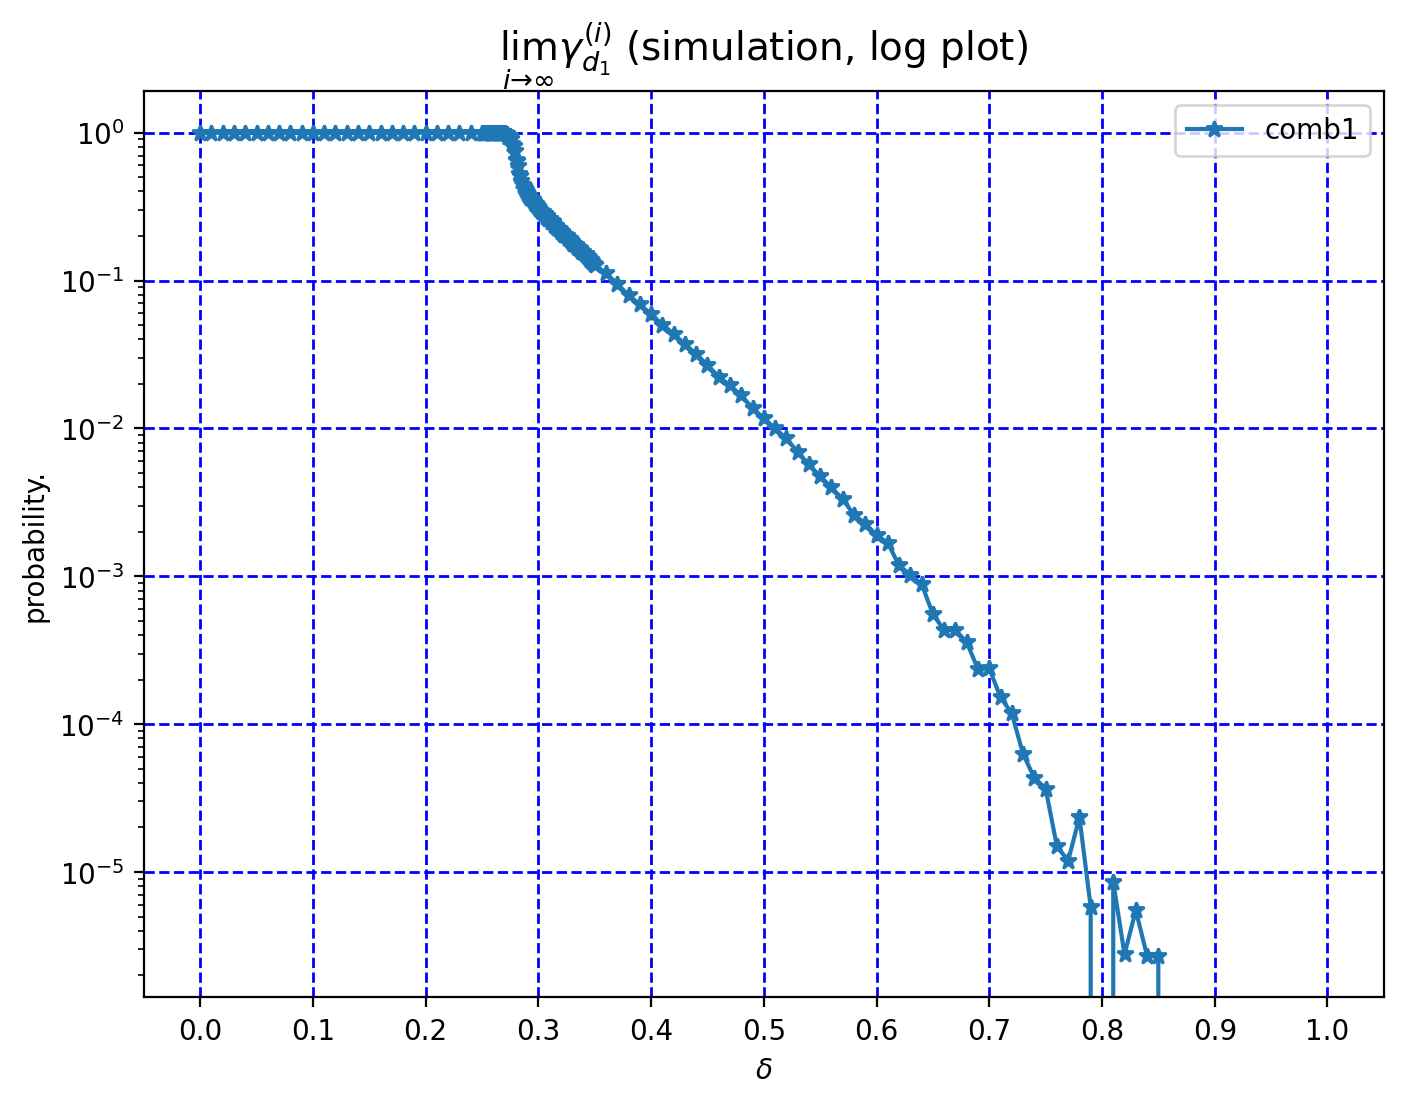

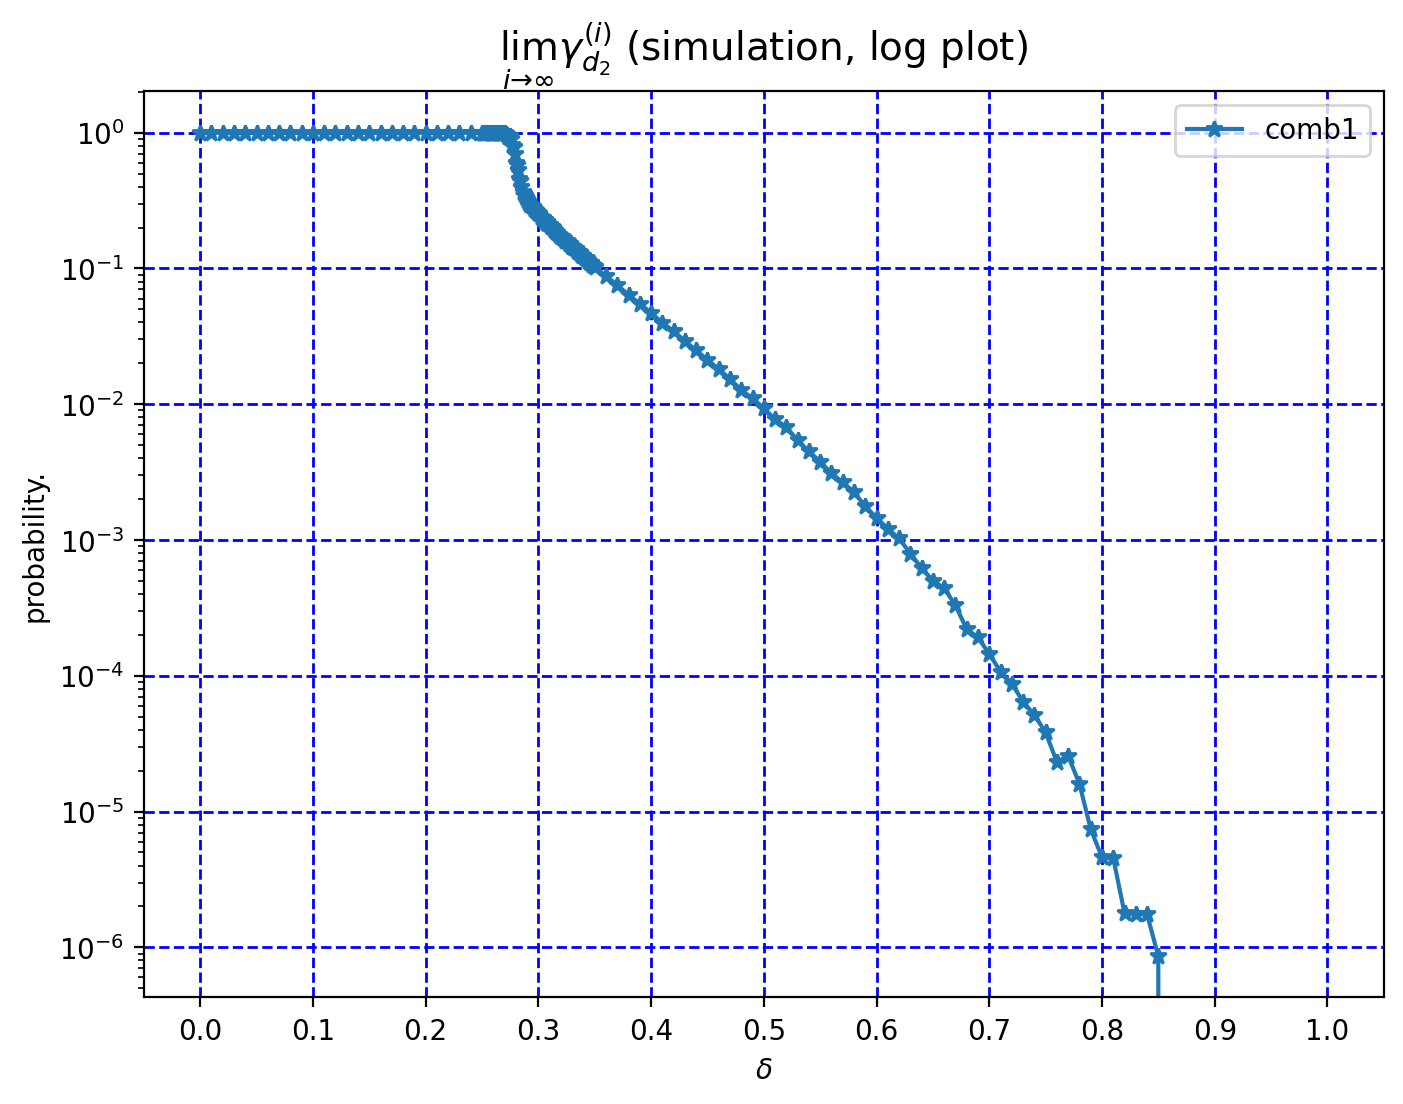

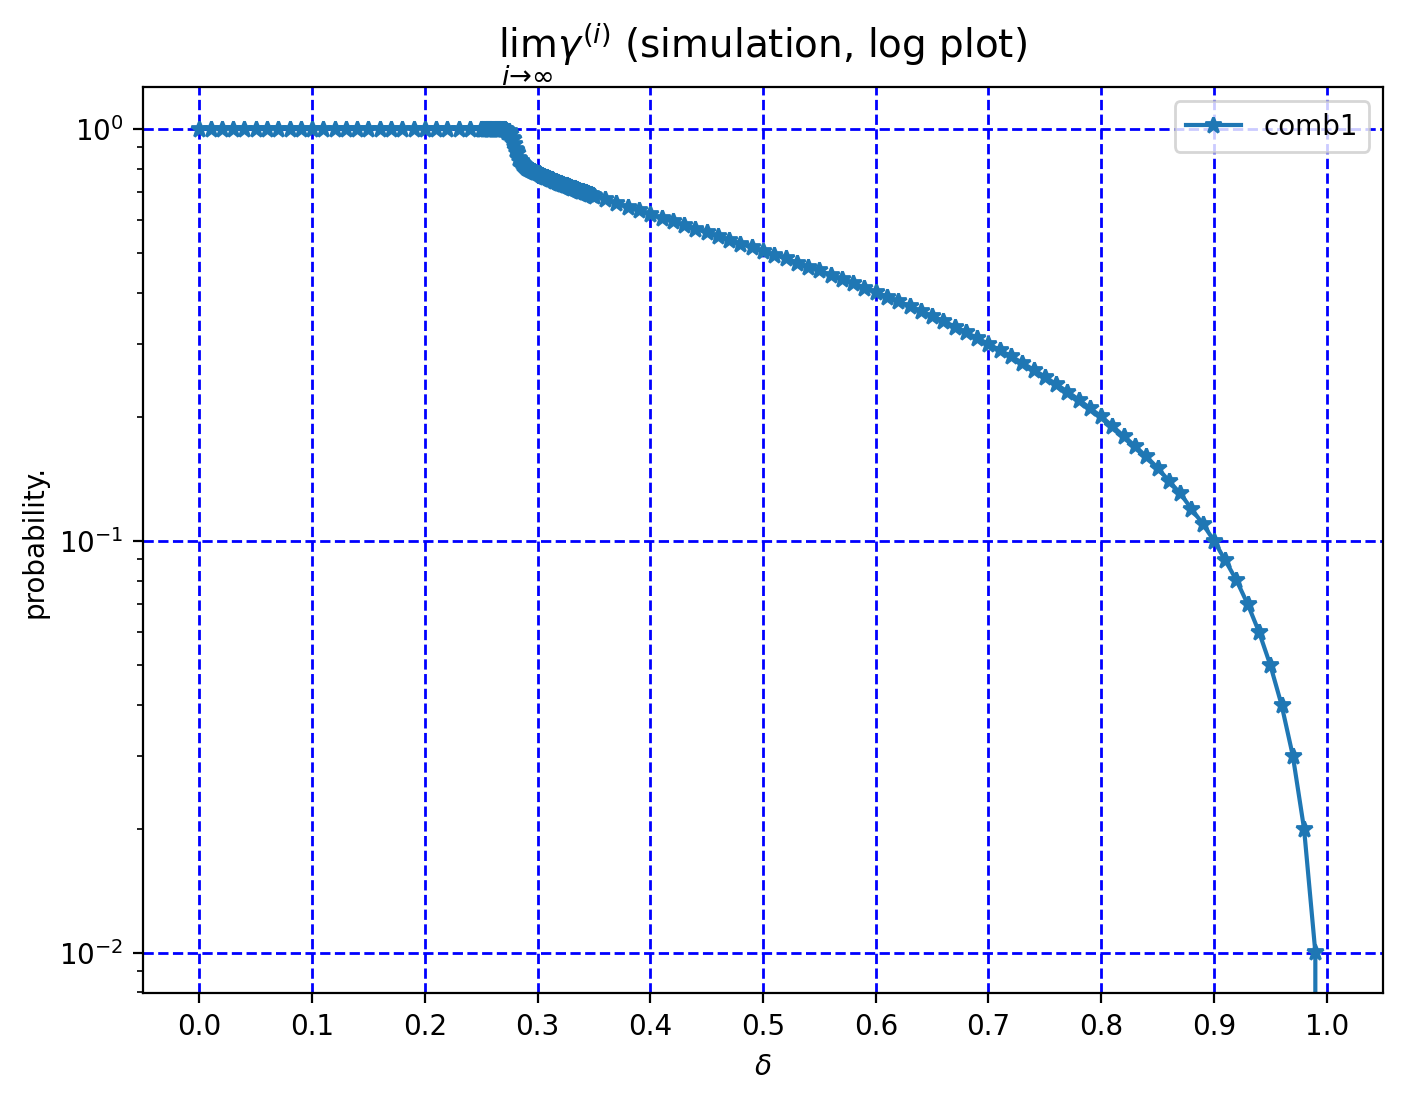

In [11]:
for m, m_str, m_latex in zip(metrics, metrics_str, metrics_LaTeX):
    fig = plt.figure(figsize=(8,6), dpi=200)

    plt.xticks(deltas_tick) # 設定刻度
    plt.yscale("log", base=10) # log plot
    plt.grid(color = 'blue', linestyle = '--', linewidth = 1) # 設定網格
    plt.title(m_latex + ' (simulation, log plot)', fontsize = 14) # 標題
    plt.xlabel(r'$\delta$') # x軸標題
    plt.ylabel("probability.") # y軸標題

    colormap = plt.cm.gist_ncar # 顏色輪流出現
    lines = []
    for data, comb in zip(m, comb_str):
        deltas = find_deltas(comb)
        line = plt.plot(deltas, data, '-*')
        lines.append(comb)
    plt.legend(lines)
    
    plt.savefig(plot_dir + m_str + '_log.png')
    plt.show()

### 4. Normal plot

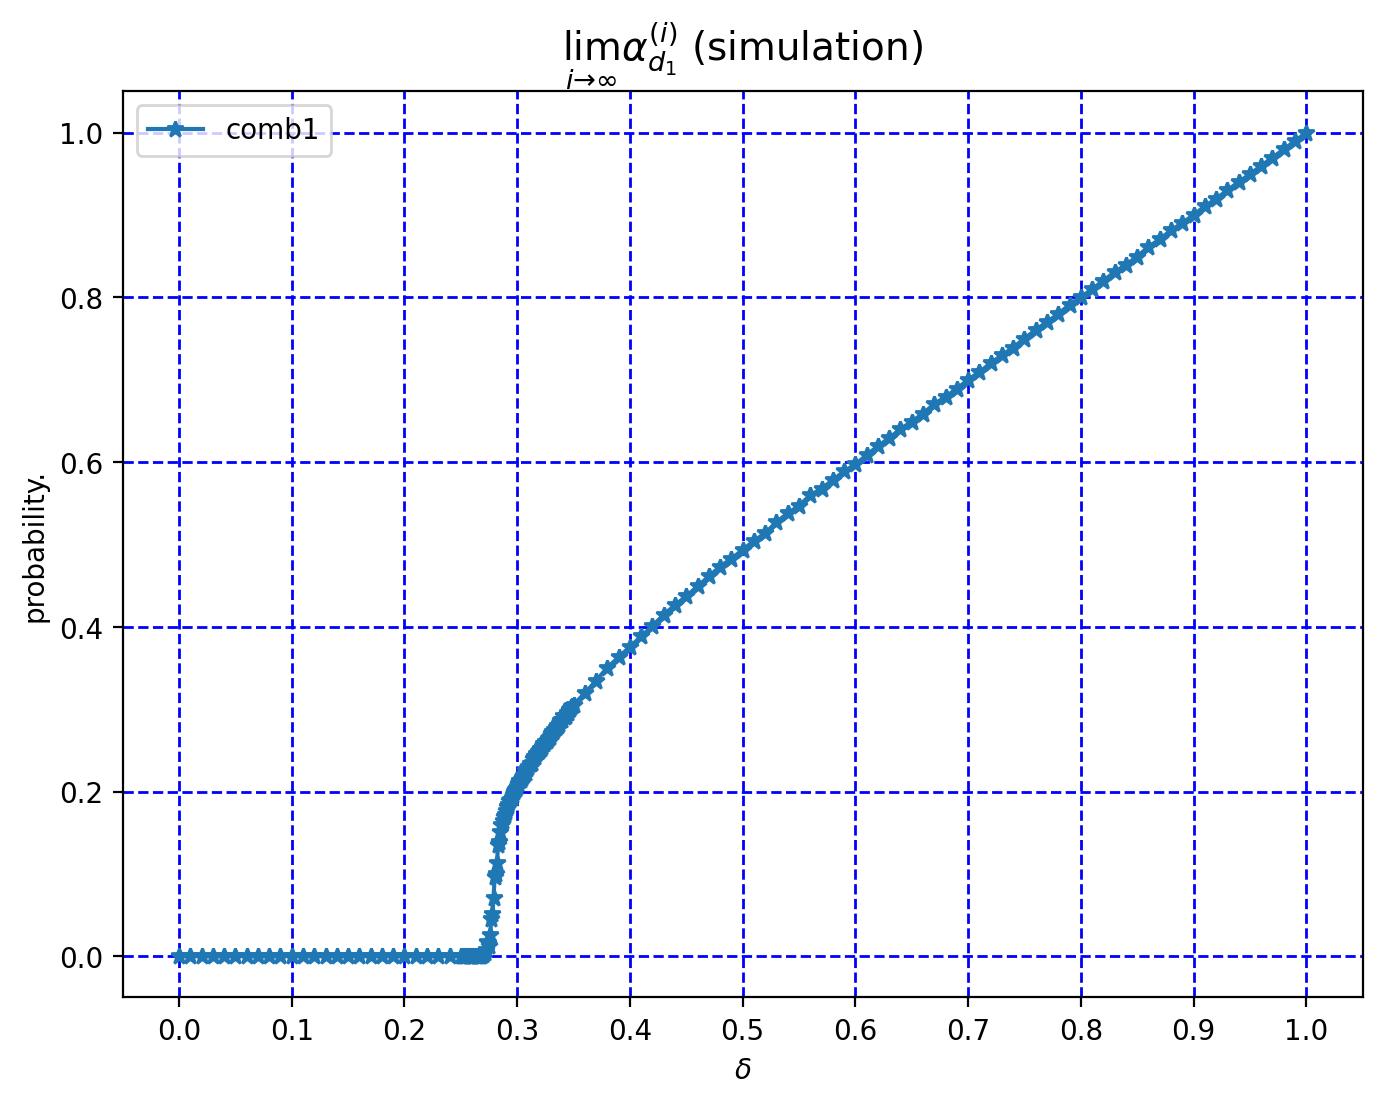

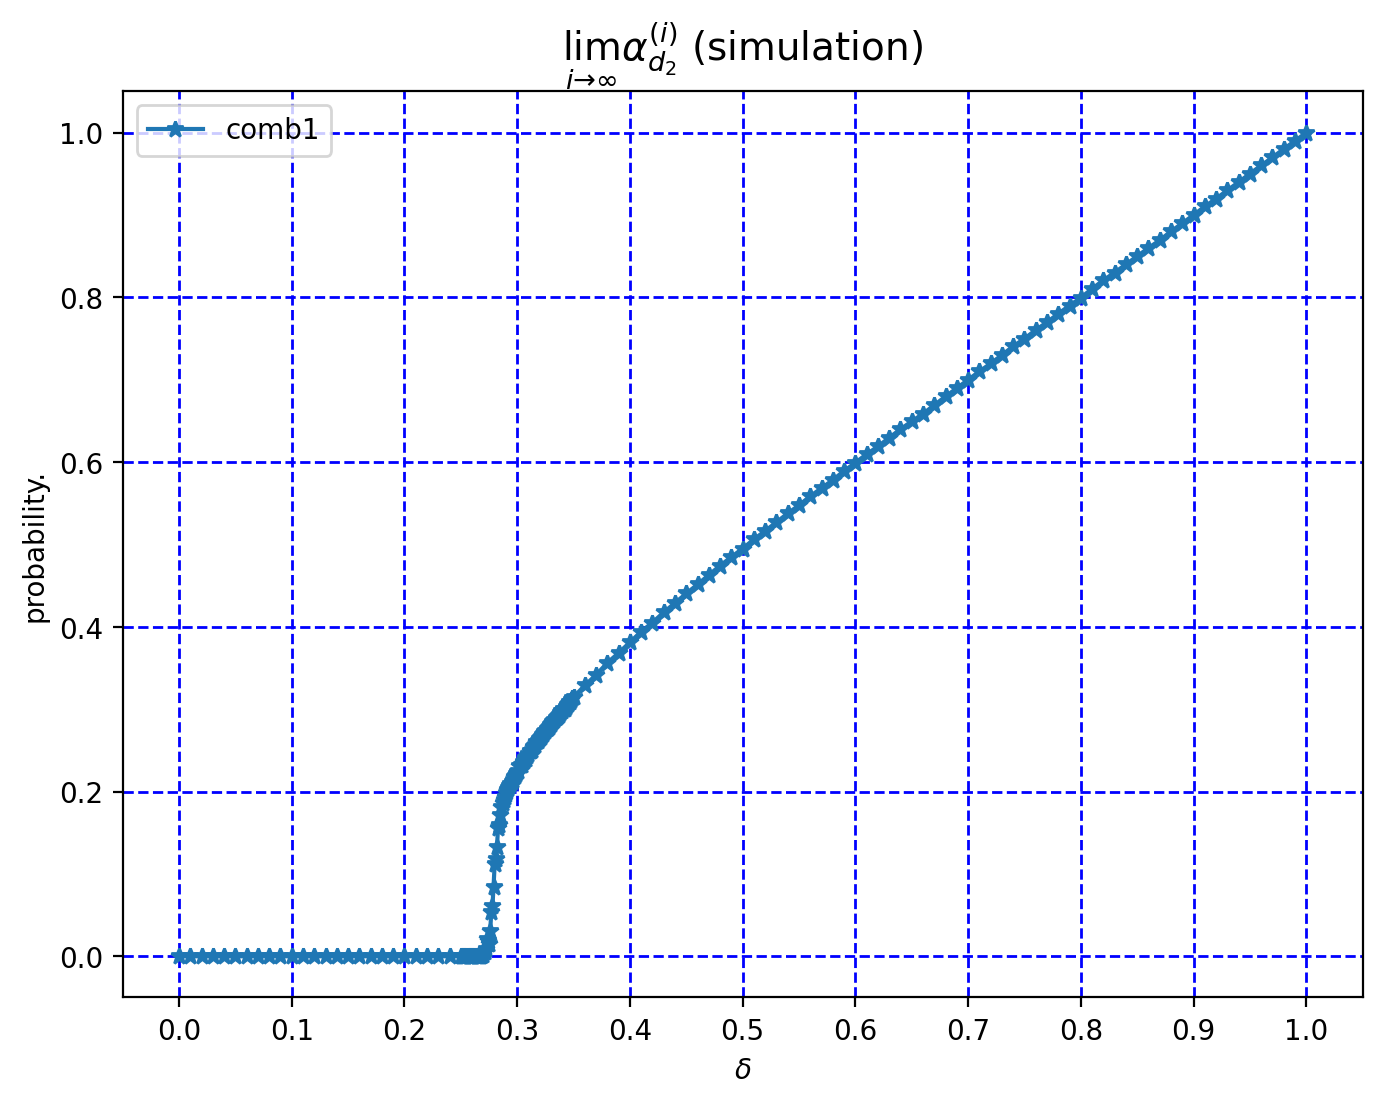

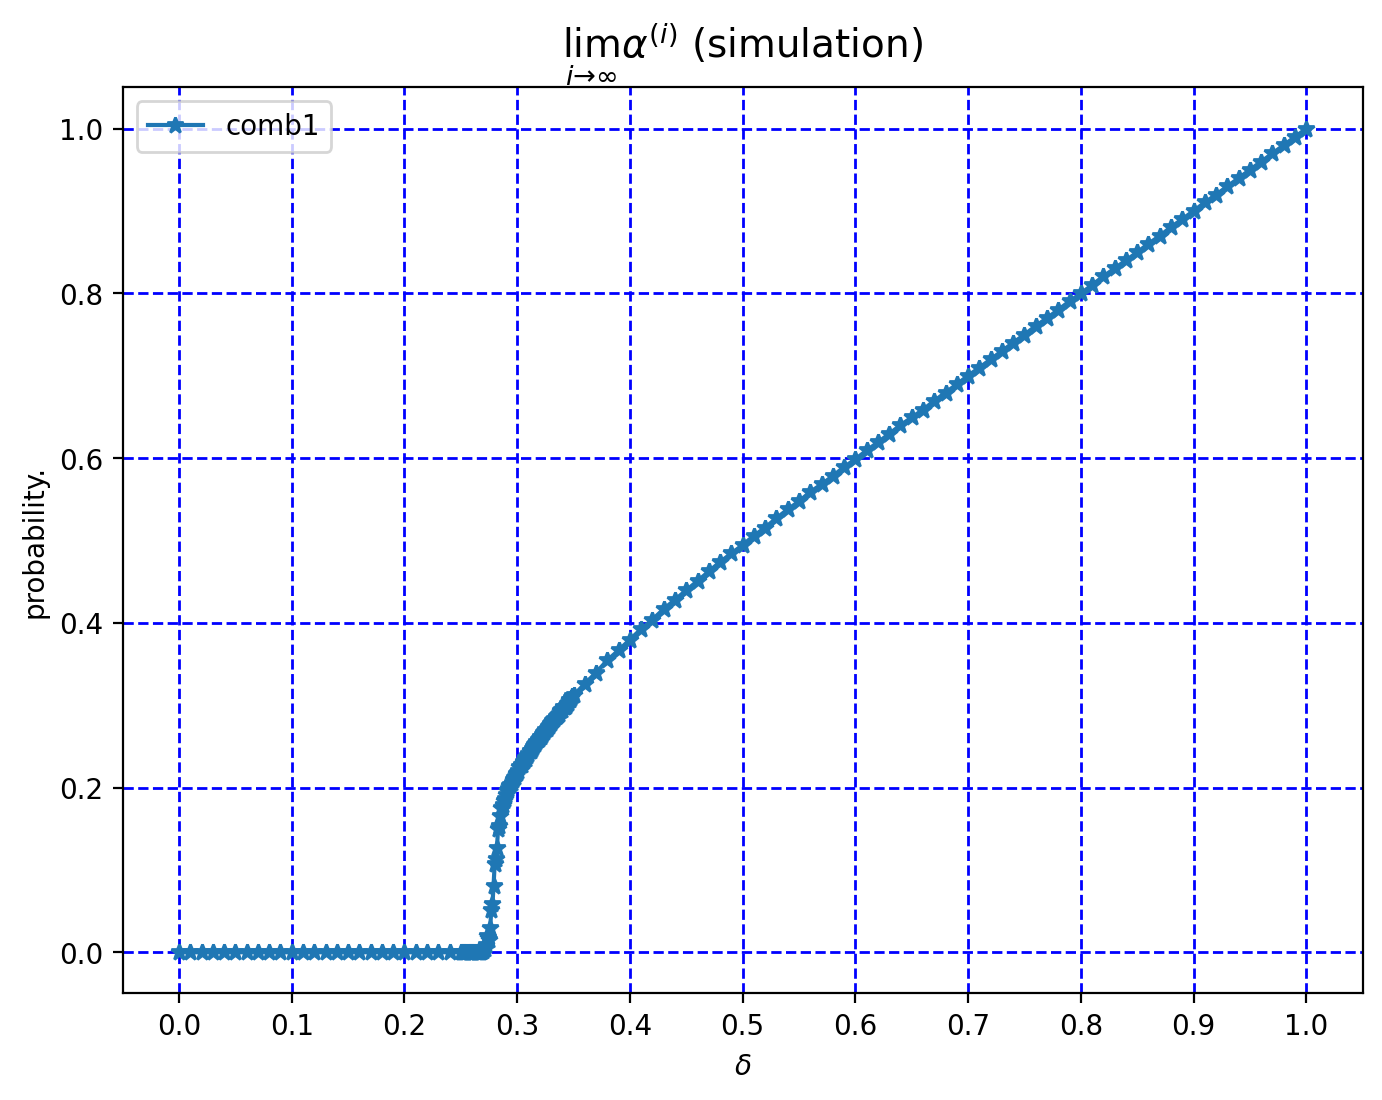

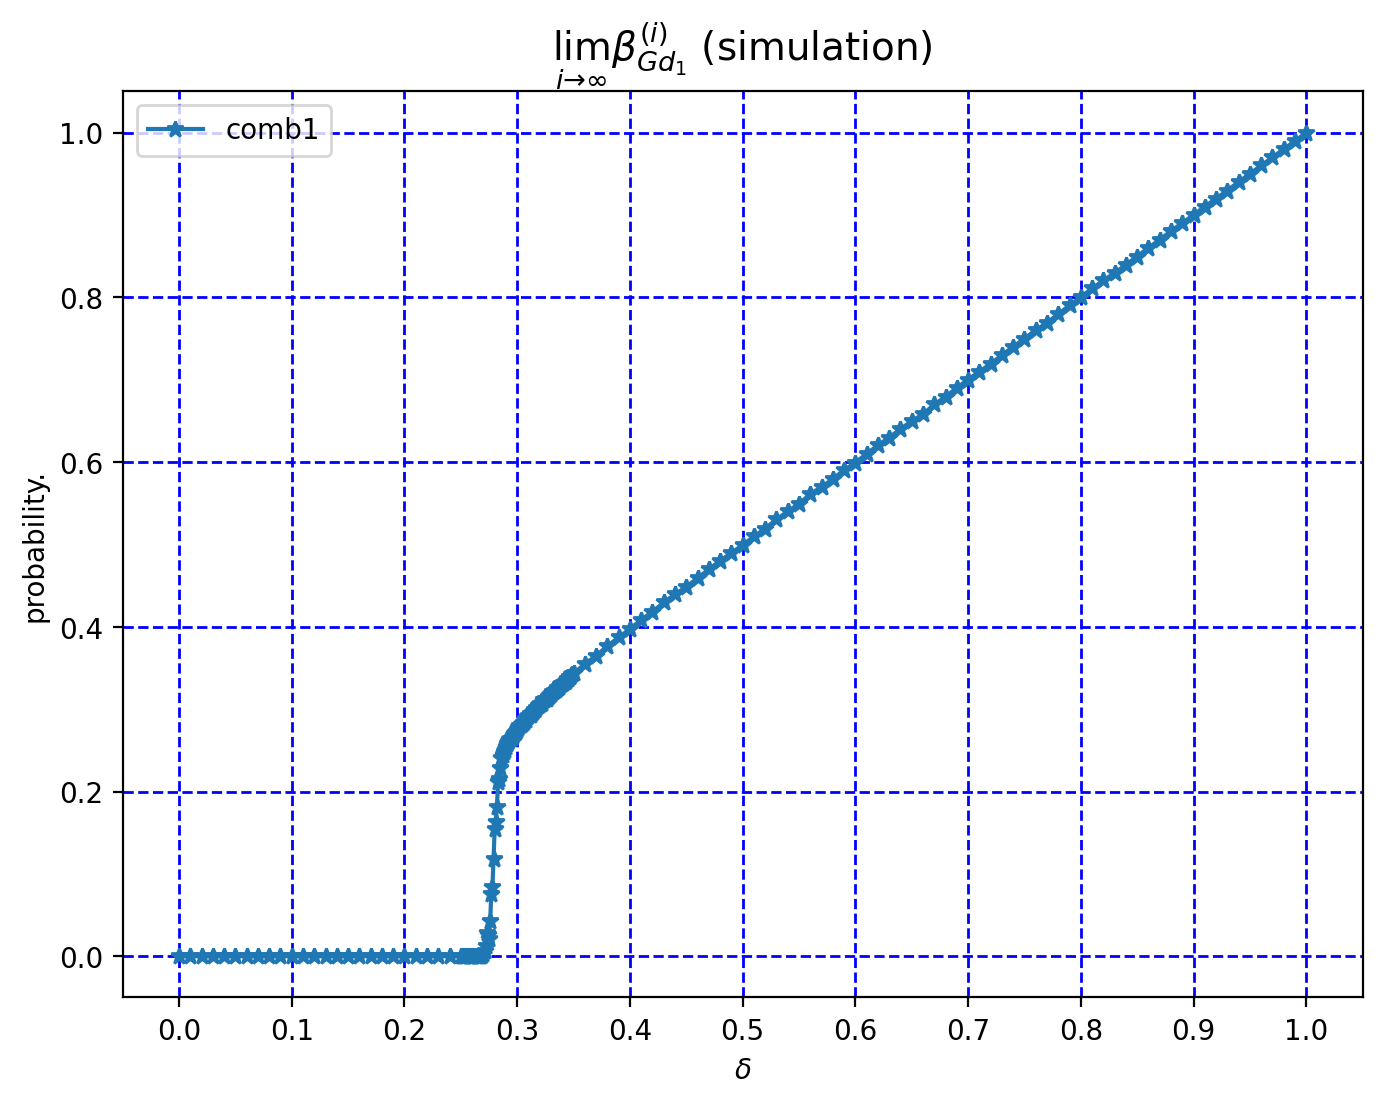

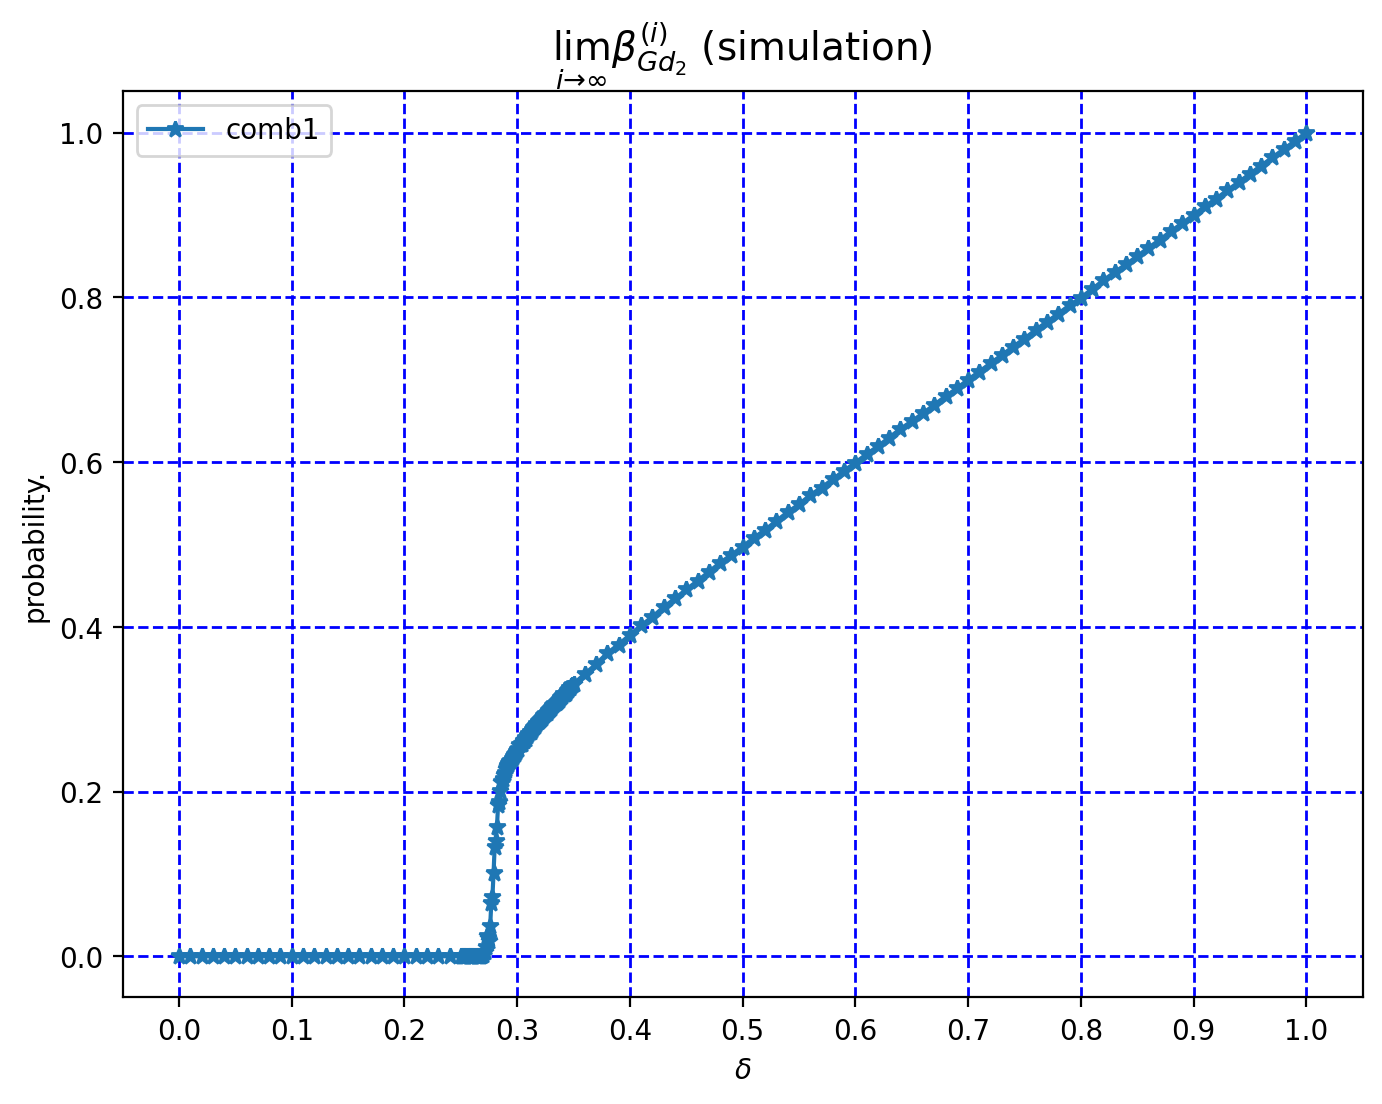

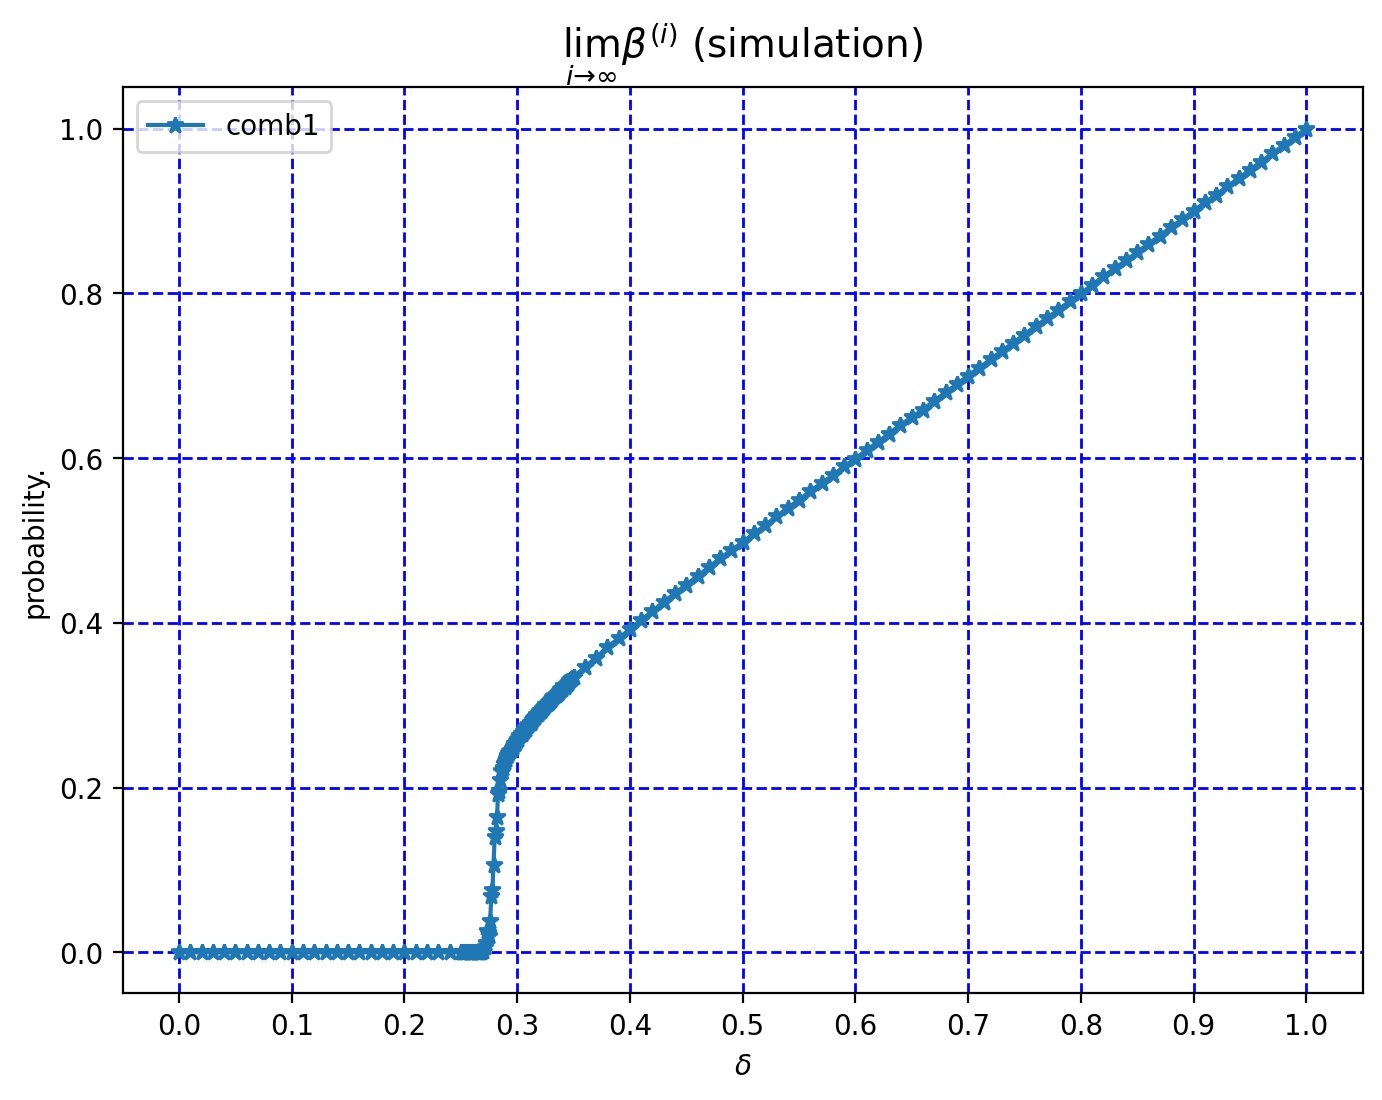

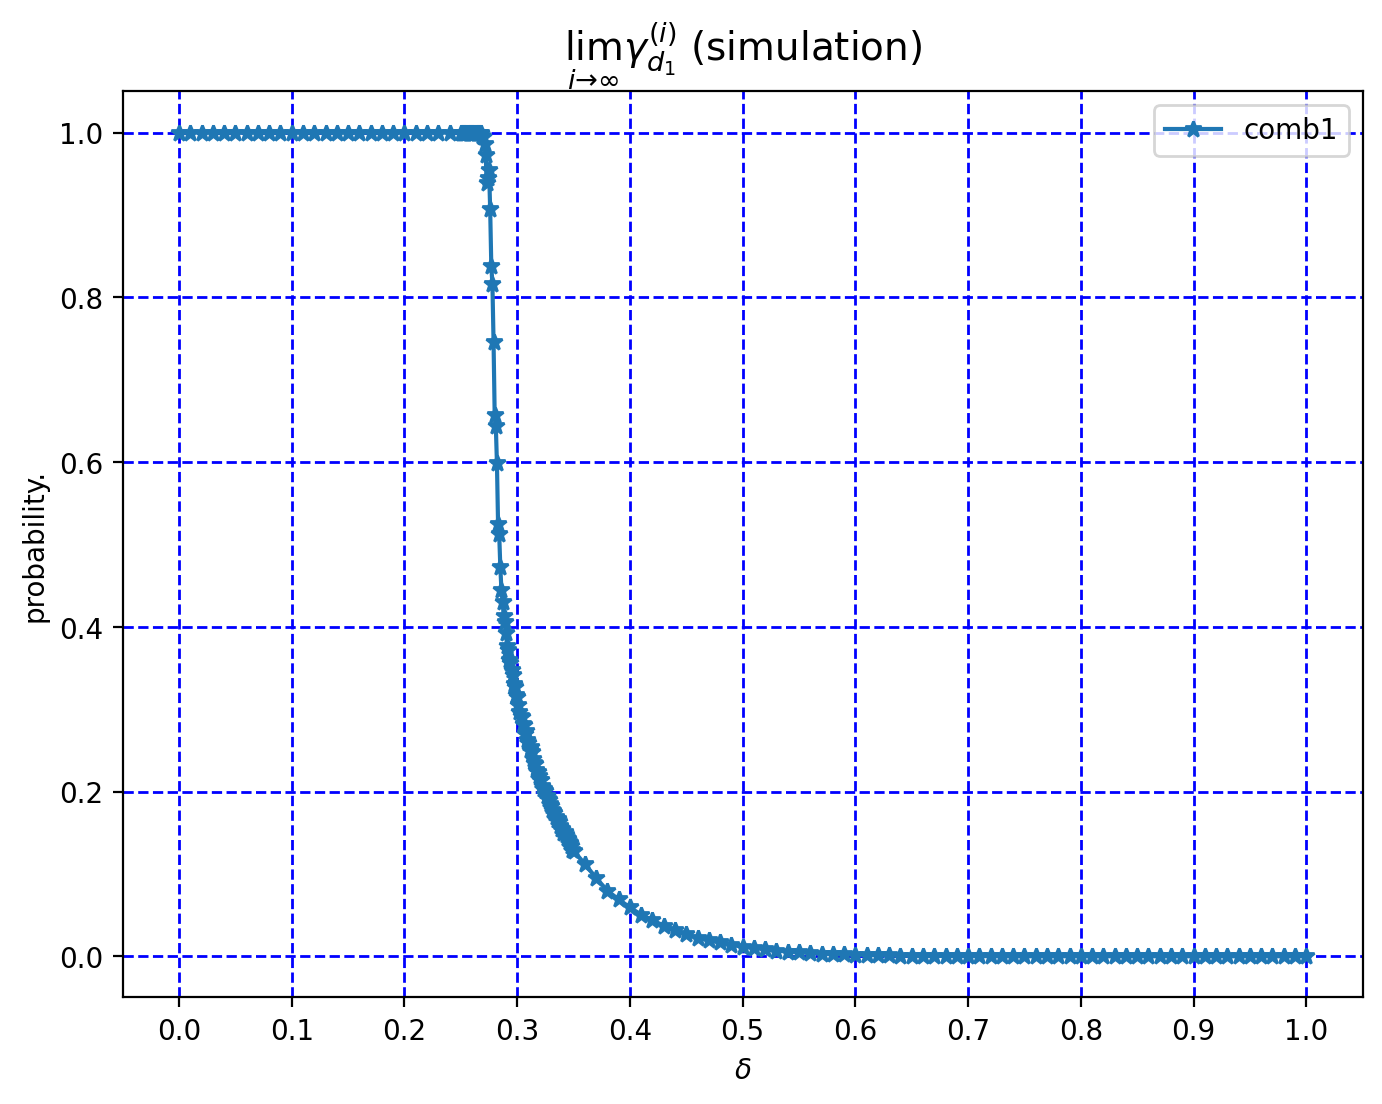

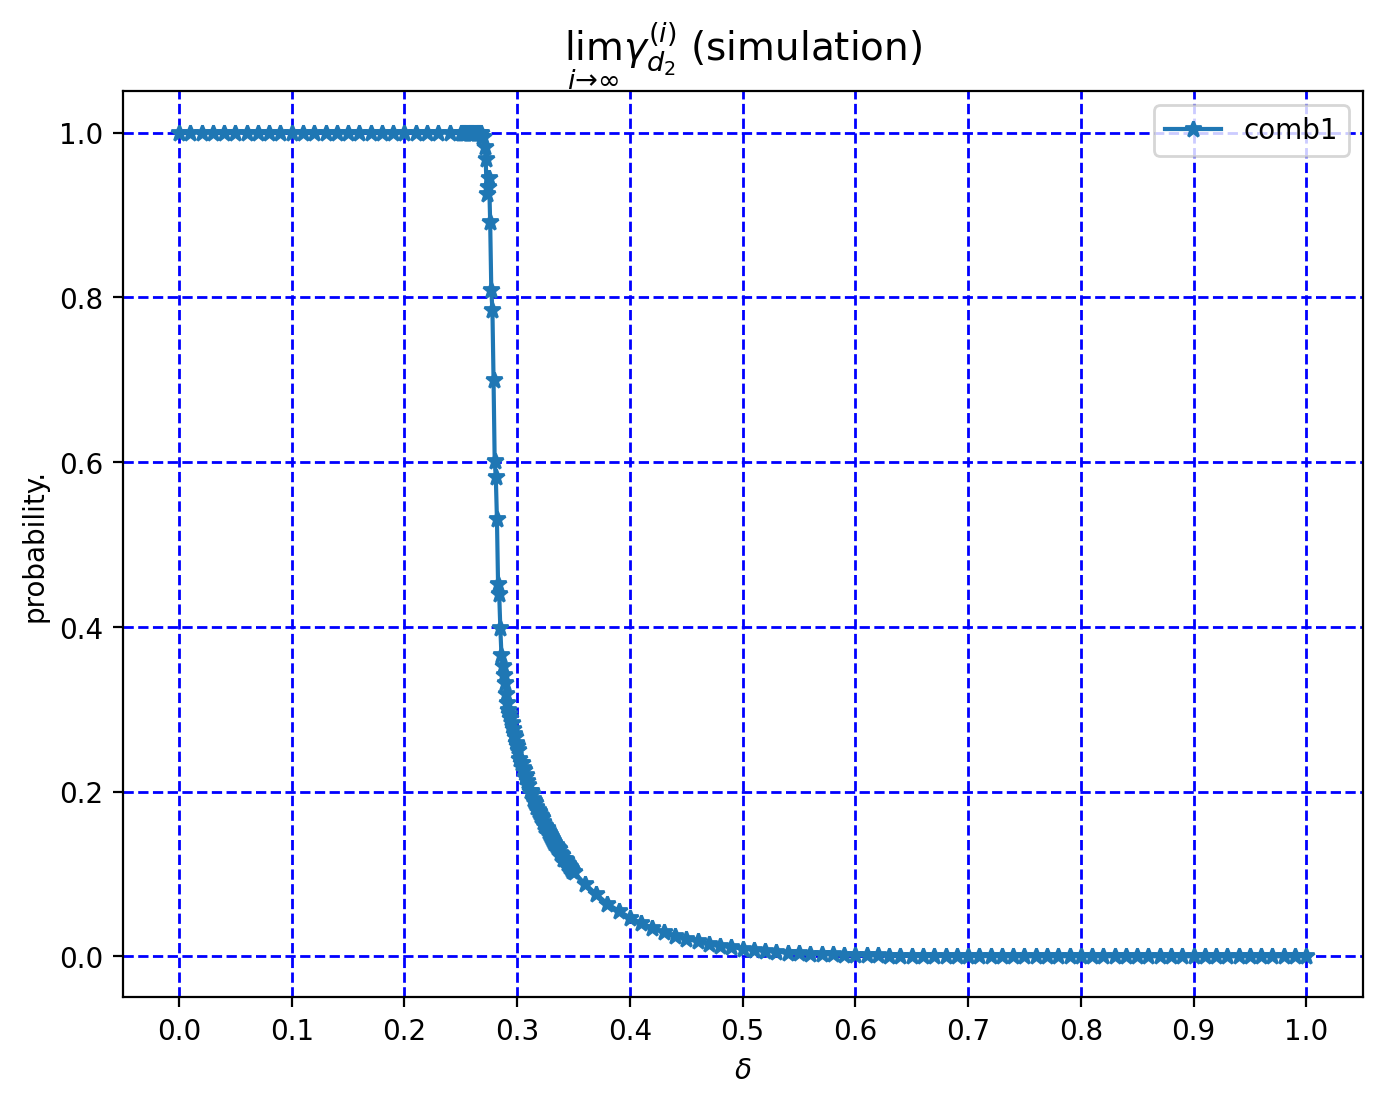

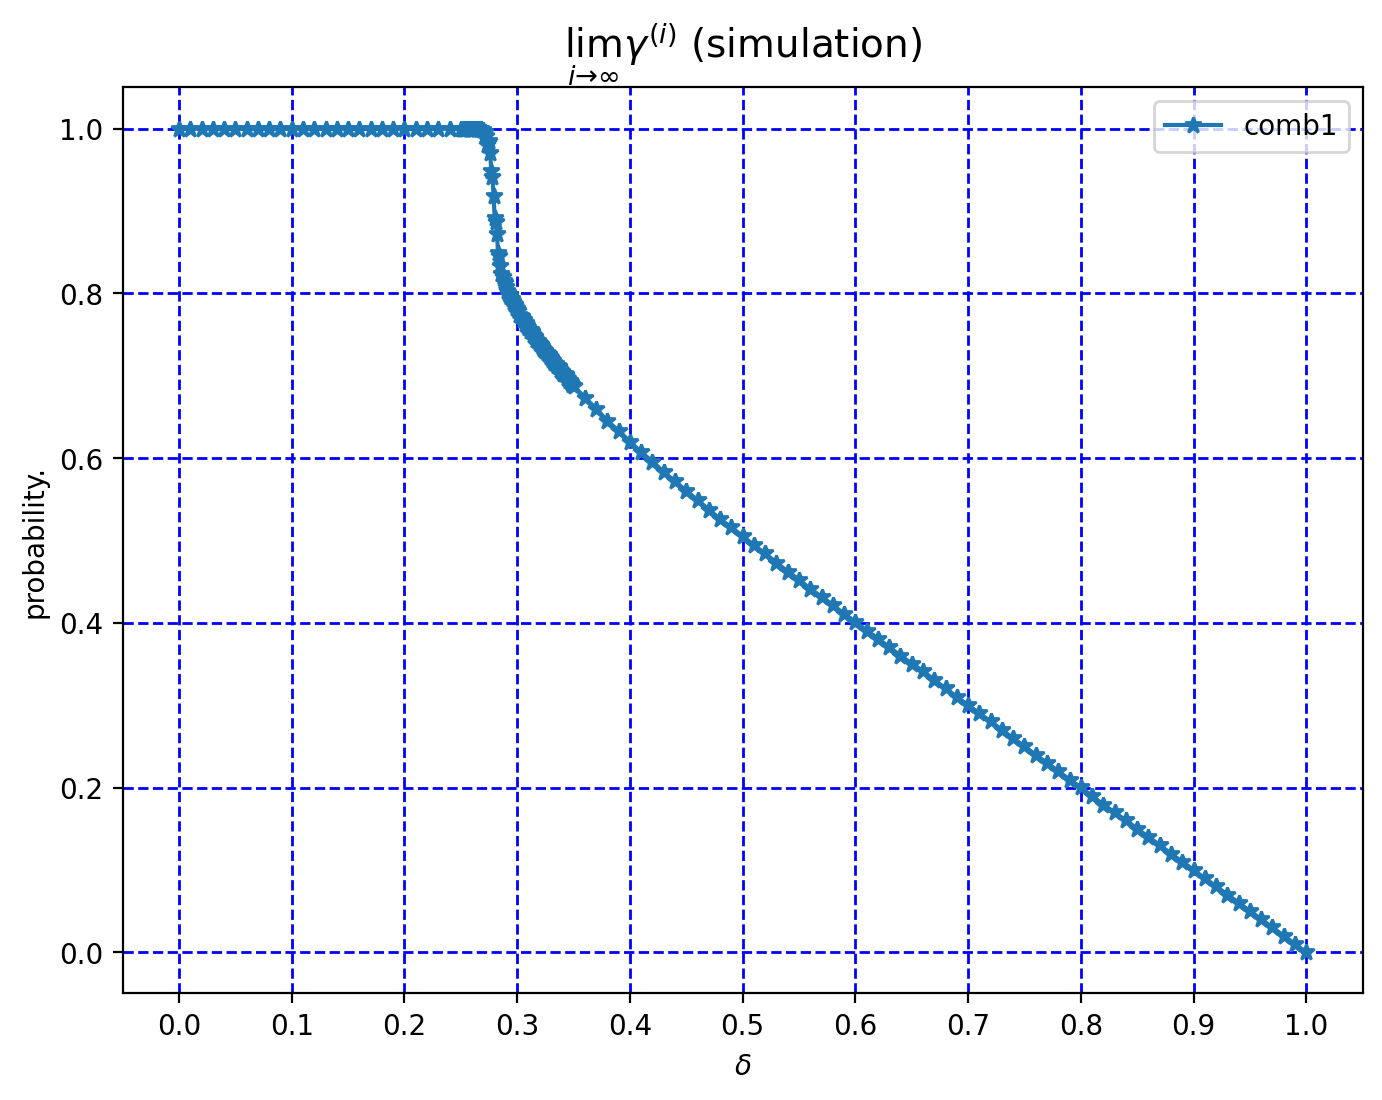

In [12]:
for m, m_str, m_latex in zip(metrics, metrics_str, metrics_LaTeX):
    fig = plt.figure(figsize=(8,6), dpi=200)

    plt.xticks(deltas_tick) # 設定刻度
    plt.grid(color = 'blue', linestyle = '--', linewidth = 1) # 設定網格
    plt.title(m_latex + ' (simulation)', fontsize = 14) # 標題
    plt.xlabel(r'$\delta$') # x軸標題
    plt.ylabel("probability.") # y軸標題

    colormap = plt.cm.gist_ncar # 顏色輪流出現
    
    lines = []
    for data, comb in zip(m, comb_str):
        deltas = find_deltas(comb)
        line = plt.plot(deltas, data, '-*')
        lines.append(comb)
    plt.legend(lines)
    
    plt.savefig(plot_dir + m_str + '.png')
    plt.show()

## 四. Percolation Threshold分析

In [13]:
# for data_a, data_y, qs in zip(metrics[0], metrics[8], q_str):
    
#     deltas = find_deltas(qs)
#     deltas_r = list(reversed(deltas))
#     data_ar = list(reversed(data_a))
#     data_yr = list(reversed(data_y))
    
# #     # 不允許任何誤差下測量Percolation Threshold
# #     i = next(x[0] for x in enumerate(data_ar) if x[1] == 0)
# #     j = next(x[0] for x in enumerate(data_yr) if x[1] == 1)
    
# #     # 允許0.01的誤差下測量Percolation Threshold
# #     i = next(x[0] for x in enumerate(data_ar) if x[1] > 1/100)
# #     j = next(x[0] for x in enumerate(data_yr) if x[1] < 99/100)
    
#     # 藉由significant gap測量Percolation Threshold
#     data_a_diff = [abs(data_a[i]-data_a[i-1]) for i in range(1,len(data_a))]
#     max_gap_a = 0
#     for i in range(1, len(data_a_diff)):
#         if (abs(deltas[i]-deltas[i-1])<0.002):
#             if (max_gap_a < data_a_diff[i]):
#                 max_gap_a = data_a_diff[i]
                
#     data_y_diff = [abs(data_y[i]-data_y[i-1]) for i in range(1,len(data_y))]
#     max_gap_y = 0
#     for j in range(1, len(data_y_diff)):
#         if (abs(deltas[j]-deltas[j-1])<0.002):
#             if (max_gap_y < data_y_diff[j]):
#                 max_gap_y = data_y_diff[j]
    
#     i = data_a_diff.index(max_gap_a)
#     j = data_y_diff.index(max_gap_y)
    
#     delta_a = deltas[i]
#     delta_y = deltas_r[j]

#     with open('./threshold' + '.csv', 'a', newline = '') as csvFile:
#         csvWriter = csv.writer(csvFile, delimiter = ',')
#         csvWriter.writerow([qs, str(delta_a), str(delta_y)])

請筱雯幫忙畫一下圖

In [14]:
for (alphas, gammas, comb) in zip(ad_limit, gamma, comb_str):
    deltas = find_deltas(comb)
    with open(plot_dir + 'alpha_and_gamma_' + comb + '.csv', 'a', newline = '') as csvFile:
        csvWriter = csv.writer(csvFile, delimiter = ',')
        for (delta, alpha, gamma) in zip(deltas, alphas, gammas):
            csvWriter.writerow([delta, alpha, gamma])